This problem was adapted from Professor Farimani's paper. If you are interested in learning more, you can read it <a href="https://www.nature.com/articles/s41699-018-0060-8.pdf">here</a>.

In [1]:
import pandas as pd
from sklearn.preprocessing import scale
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# (a)
# data preprocessing
data = pd.read_csv('data.csv')
X = data.values.reshape(2000,2)
y = np.zeros(2000)
for i in range(100):
    xx = np.arange(20)
    y[np.arange(20*i, 20*i+20)] = xx

data = np.column_stack((X, y))
np.savetxt("processed_data.csv", data, delimiter=",", comments='',header = 'Feature 1, Feature 2, labels')


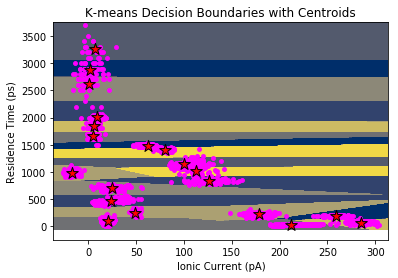

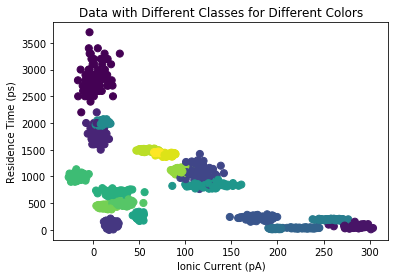

In [3]:
#k-means
X_train, X_test, y_train, y_test = train_test_split(data[:,[0,1]], data[:,2], test_size = 0.3, random_state = 0)
kmeans = KMeans(n_clusters = 20, random_state=0)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)
centroids = kmeans.cluster_centers_

 # create model
kmeans = KMeans(n_clusters = 20, random_state=0)
kmeans.fit(X_train)


# draw contour lines from model
x_min, x_max = data[:, 0].min() - 10, data[:, 0].max() + 10
y_min, y_max = data[:, 1].min() - 50, data[:, 1].max() + 50
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = 'cividis')

# add data points
plt.scatter(data[:, 0], data[:, 1], marker = 'o', c = 'magenta', s = 15, label = 'Training Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker = '*', c = 'red', edgecolor='black', s = 150, label = 'Centroids')
plt.xlabel('Ionic Current (pA)')
plt.ylabel('Residence Time (ps)')
plt.title('K-means Decision Boundaries with Centroids')
plt.show()

# Data in different colors
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 50, cmap = 'viridis')
plt.xlabel('Ionic Current (pA)')
plt.ylabel('Residence Time (ps)')
plt.title('Data with Different Classes for Different Colors')
plt.show()

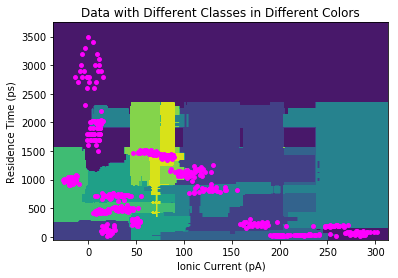

The accuracy of the random forest classifier is 94.5%


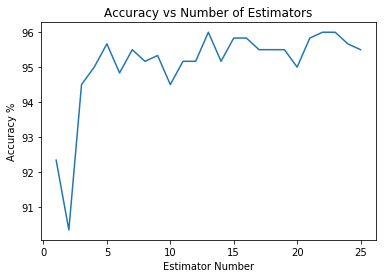

In [4]:
# (c)
# random forest model
X_train, X_test, y_train, y_test = train_test_split(data[:,[0,1]], data[:,2], test_size = 0.3, random_state = 0)
randforest = RandomForestClassifier(n_estimators = 10, random_state = 0)
randforest.fit(X_train, y_train)
y_randforest = randforest.predict(X_test)

# calculate accuracy
counter = 0
for j in range(len(y_randforest)):
    if y_randforest[j] == y_test[j]:
        counter += 1
    else:
        pass
accuracy1 = counter/len(y_randforest)

# variable estimation
accuracy = np.zeros(25)
for i in range(25):
    randforest = RandomForestClassifier(n_estimators = i+1, random_state=0)
    randforest.fit(X_train, y_train)
    y_randforest = randforest.predict(X_test)
    counter = 0
    for j in range(len(y_randforest)):
        if y_randforest[j] == y_test[j]:
            counter += 1
        else:
            pass
    accuracy[i] = counter/len(y_randforest)


# decision boundary for random forest
x_min, x_max = data[:, 0].min() - 10, data[:, 0].max() + 10
y_min, y_max = data[:, 1].min() - 50, data[:, 1].max() + 50
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))
Z = randforest.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = 'viridis')

# add data points
plt.scatter(X_test[:, 0], X_test[:, 1], marker = 'o', c = 'magenta', s = 15)
plt.xlabel('Ionic Current (pA)')
plt.ylabel('Residence Time (ps)')
plt.title('Data with Different Classes in Different Colors')
plt.show()

print("The accuracy of the random forest classifier is {}%".format(np.round(accuracy1*100, 4)))

y = accuracy * 100
num_of_trees = np.arange(1,26,1)
plt.plot(num_of_trees, y)
plt.xlabel('Estimator Number')
plt.ylabel('Accuracy %')
plt.title('Accuracy vs Number of Estimators')
plt.show()


# (d)
# Analysis
I noticed that the decision boundaries for K-means were a lot more comprehensive than for the random forest, here the seperation of the classes is a lot more well-defined than for random forest. The reasoning for this may be that the domain of the random forest classifier is in terms of trees but kmeans is in cartesian space. When looking at the accuracies, however, can see that random forest performs very well. 